In [1]:
import nltk
import scipy.stats as ss
import matplotlib.pyplot as plt 
import math

In [2]:
from nltk.corpus import reuters
from nltk.corpus import wordnet

In [3]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to C:\Users\TIRTH
[nltk_data]     JOSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [4]:
reuters_words = [w.lower() for w in reuters.words()]
words = set(reuters_words)
counts = [(w, reuters_words.count(w)) for w in words]

In [5]:
words_1 = [w for (w, c) in counts]
counts_1 = [c for (w, c) in counts]

In [6]:
count_rank = ss.rankdata([c for (w, c) in counts])
count_rank

array([27544.5,  5513. , 13183.5, ..., 25784. , 20936.5, 13183.5])

In [7]:
counts_ranked = zip(words_1, counts_1, count_rank)
#counts_ranked[100:110]

In [8]:
counts_sorted = sorted(counts_ranked, key=lambda item: item[2])
counts_sorted[20000:20010]

[('surpass', 5, 19949.0),
 ('trilogy', 5, 19949.0),
 ('bona', 5, 19949.0),
 ('taqi', 5, 19949.0),
 ('norddeutsche', 5, 19949.0),
 ('jewelmasters', 5, 19949.0),
 ('nes', 5, 19949.0),
 ('hectic', 5, 19949.0),
 ('bukhoosh', 5, 19949.0),
 ('fslic', 5, 19949.0)]

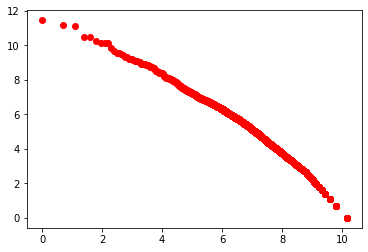

In [9]:
L = len(counts_sorted)
plt.plot([math.log(L-r+1) for (w, c, r) in counts_sorted], [math.log(c) for (w, c, r) in counts_sorted], 'ro')

In [10]:
import numpy as np

In [11]:
# generate x and y
x = [math.log(L-r+1) for (w, c, r) in counts_sorted]
y = [math.log(c) for (w,c,r) in counts_sorted]
X = np.array(x)
Y = np.array(y)
A = np.vstack([X, np.ones(len(X))]).T
Y_ = Y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y_)
print(alpha)

[[-1.59893073]
 [16.37719998]]


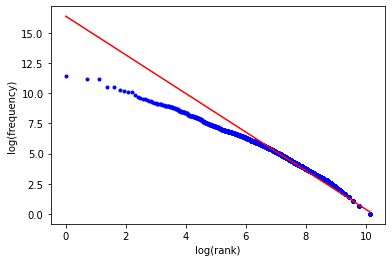

In [12]:
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()